In [1]:
!pip install matplotlib
!pip install seaborn

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/



<div>
<h1>Clustering</h1>
Clustering is the grouping of objects in such a way that the objects in each category are more similar to each other than other objects in other categories.

<img src="https://drive.google.com/uc?id=1RDHbS2bWOKM4WAq7sGMhrVLLBxegNer0"></img>

Some common applications of these algorithms are mentioned below:
- Compression
- Recommender systems
- Classification based on similarity
- Categorizing similar web pages (for example, Google News)
- Categorizing customers based on shopping taste to provide better service
</div>


<div >
<h2>Sample data</h2>
To start, we generate random data.
</div>

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
print(X.shape)

(100, 2)


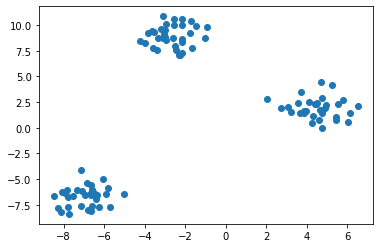

In [3]:
plt.scatter(X[:, 0], X[:, 1])

<div>
<h2> k-means</h2>
<div>
One of the simple and relatively widely used algorithms for clustering is the k-means algorithm. Our goal in this exercise is not to implement this algorithm, but only to familiarize ourself with it. To use this and other clustering algorithms, we can use the <code>sklearn.cluster</code> modules..</div>
</div>

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)

In [5]:

kmeans = kmeans.fit(X)
labels=kmeans.labels_
print(labels)

[1 0 2 0 1 0 2 0 0 2 2 1 1 2 2 1 1 2 1 1 2 1 1 2 2 2 0 1 1 1 1 0 0 1 2 2 2
 2 0 0 1 2 0 2 2 0 1 1 1 0 0 0 2 1 1 1 2 2 0 2 1 0 1 0 1 1 0 1 0 0 0 1 1 2
 0 1 0 1 0 0 2 0 2 1 2 2 2 0 2 0 0 0 2 0 2 2 2 0 1 2]


<div>
<h2>Viewing the result</h2>
We can see the clustering result with the following code snippet. In this piece of code, we can set the color palette for plotting different items. In this code, we used the cold color palette.
</dir>

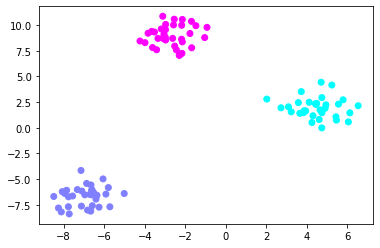

In [6]:
plt.scatter(X[:, 0], X[:, 1], cmap=plt.cm.cool, c=labels)

<div>
<h2>Determining the number of clusters</h2>
One of the weaknesses of the k-means algorithm is specifying the number of clusters. In this example, we can guess the number of clusters by looking at the figure. But in the real world this cannot be done. One way is to reduce the dimension using PCA, which you saw in the first exercise. Another method is to use the elbow method.

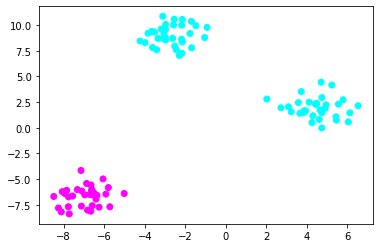

In [7]:

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans = kmeans.fit(X)
labels=kmeans.labels_
plt.scatter(X[:, 0], X[:, 1], cmap=plt.cm.cool, c=labels)

<div>
<h2>elbow method</h2>
</div>

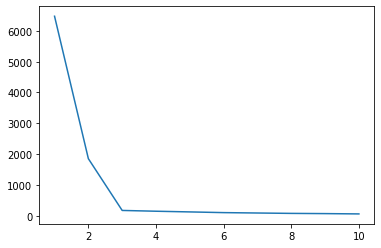

In [8]:

cost=[]
k=10
for i in range(1,k+1):
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans = kmeans.fit(X)
  cost.append(kmeans.inertia_)
plt.plot([i for i in range(1,k+1)],cost)


<div>
As you can see, k=3 is the elbow point.
</div>

<div>
<h2>More complex clustering methods</h2>
k-means is not the only clustering algorithm. Below, different clusterings by k-means of different data are plotted.
  You can see in which case this algorithm works well. All these codes are used from <code>sklearn</code> document. You can view this documentation at <a href="https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html">here</a>. You can also see other algorithms in the <code>sklearn</code> documentation.
</div>

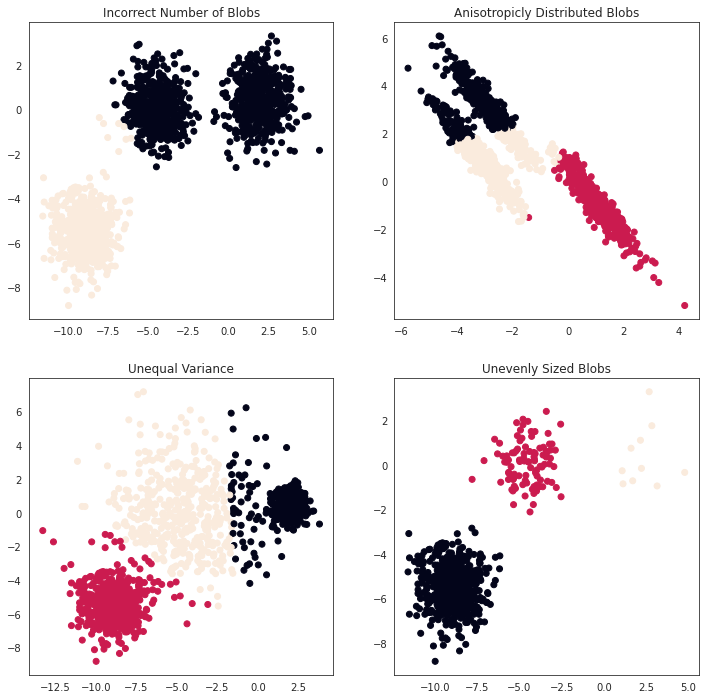

In [6]:
sns.set_style('white')

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()


<div>
<font> Number clustering
The digits dataset is loaded below. We use the k-means algorithm for this data set and consider the number of clusters equal to 10 and then we Display cluster centers. To do this, convert all 64 numbers into an 8x8 matrix. We then use Isomap to compress our data. This algorithm also performs dimension reduction like PCA and Convert the data to 2D data points. (found in <code>sklean.manifold.Isomap</code>). we Then plot two graphs. In the first graph we show the of each data with the labels and colors generated by the kmeans algorithm, and in the second graph tje label of each data is equal to corresponding value in digits.target, which is the class label.
 Based on the graphs it is possible to see in a relative manner what number each center represents. For example, the data that are in a category whose center is similar to the number 2 are the data that represent the number 2 and are actually a photo of the number 2. The problem is that because the algorithm is unsupervised,  you have to use your eyes to see what number each center represents. We also tried to solve this problem with an ANN, which can be seen in the ANN repository.
</font>
</div>

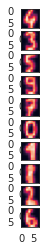

In [10]:
from sklearn.datasets import load_digits
from matplotlib.pyplot import imshow
temp =load_digits(return_X_y=True)
digits=temp[0]
labels=temp[1]
kmeans = KMeans(n_clusters=10, random_state=0).fit(digits)
centers=kmeans.cluster_centers_
# for i in range(len(centers)):
#  imshow(
f, axarr = plt.subplots(10,1) 
for i in range(len(centers)):
  axarr[i].imshow(np.reshape(centers[i],(8,8)))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


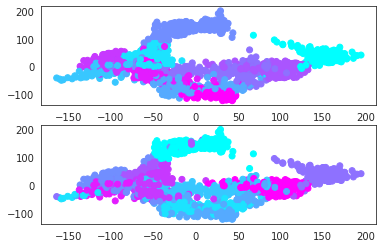

In [11]:
from sklearn.manifold import Isomap 
embedding = Isomap(n_components=2)
kmeanslabels=kmeans.labels_
digit_transformed = embedding.fit_transform(digits)
f, axarr = plt.subplots(2,1) 
axarr[0].scatter(digit_transformed[:, 0], digit_transformed[:, 1], cmap=plt.cm.cool, c=labels)
axarr[1].scatter(digit_transformed[:, 0], digit_transformed[:, 1], cmap=plt.cm.cool, c=kmeanslabels)

<div>
<font> Image compression with kmeans</font>
<font>
One of the applications of this algorithm is image compression. In the image that is included with the exercise. You see a picture of a bird. In the code snippet below (the third code snippet) you can see the color distribution used in this photo. Now all we have to do is to divide these colors into 4 clusters and use the color of each center as the color for data located in the cluster of that center and them plot the image with new colors.
</font>
</div>

In [12]:
# from google.colab import drive
# drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [13]:
from matplotlib.pyplot import imread

# img = imread('/content/gdrive/MyDrive/bird/bird.jpg')
img = imread('bird.jpg')


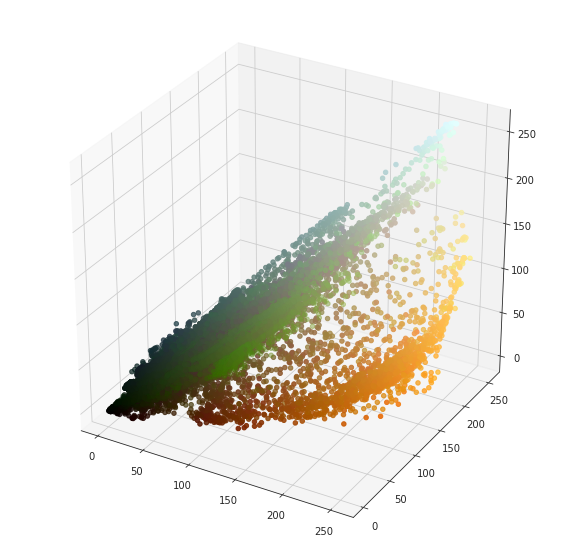

In [14]:

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(111, projection='3d')

A = img.reshape((img.shape[0] *img.shape[1], 3))

ax.scatter3D(A[:, 0], A[:, 1], A[:, 2], color=A[:]/255.0)

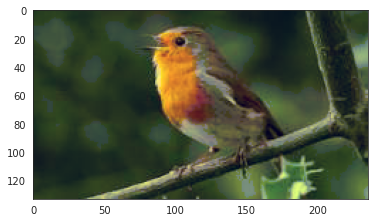

In [15]:
from matplotlib.pyplot import imshow
kmeans = KMeans(n_clusters=4, random_state=0).fit(A)
labels=kmeans.labels_
centers=kmeans.cluster_centers_
B=np.array(A)
for i in range(len(B)):
    B[i,2]=centers[labels[i],2]
imshow(np.reshape(B,((133, 236, 3))))




<div>
<h1>DBSCAN</h1>
DBSCAN algorithm is one of the other algorithms used for data clustering, which can cluster data with different shapes of distirbution and detect noises and anomalies in the data. Considering the said advantage, in this section we want to re-cluster the two data sets mentioned in the "More complex clustering methods" section using the DBSCAN algorithm. Consider the datasets <code>X_aniso</code> and <code>X_varied</code>. To run the DBSCAN algorithm, there is no need to determine the number of clusters, and you only need determine the two main parameters of this algorithm, i.e. epsilon and the minimum number of points in each cluster, in such a way that your output becomes more accurate.
</div>


<div>
<h1>Determining epsilon</h1>
To find the best epsilon or eps suitable for the data set, in addition to testing different values, the KNN distance method (calculating the average distance between each point and its k nearest neighbors) is also used to automatically determine the optimal epsilon value. k here is equal to the minimum number of points in the cluster or MinPts. The reason why we use knn and the elbow point method to find the optimal value of eps (after determining the value of k or minpts and calculating the knn distances) is that before the elbow point , the increase of the knn distances is gradual, but after the elbow point there is a jump in the distance and as a result, the data that have a distance greater than this elbow point are most likely outliers, and in order for these data to not have a negative impact on our clustering and causing neighborhoods to become too big and therefore produced clusters   not having the proper density, eps must be equal to elbow point. Note that k1 and the first graph are for X_aniso and k2 and the second graph are for X_varied.
 Unlike the epsilon parameter, there is no automatic method for determining MinPts, but according to
 some characteristics of the data set, there are some general rules that can help us find the appropriate range of MinPts values for that data set.
 The NearestNeighbors module in the Scikit-learn library was used to draw the k-distance graph, and the kneed library was used to determine the epsilon value.
</div>

In [42]:
!pip install --upgrade kneed

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import v_measure_score
from kneed import KneeLocator
import pandas as pd


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


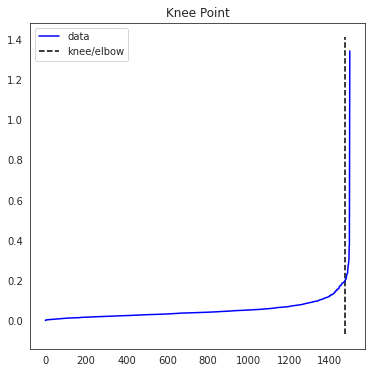

In [44]:
minpts=1
knn_graphX_aniso=kneighbors_graph(X_aniso, n_neighbors=minpts,mode='distance')
knn_graphX_varied=kneighbors_graph(X_varied, n_neighbors=minpts,mode='distance') 
distMatrixX_aniso=knn_graphX_aniso.toarray()
distMatrixX_varied=knn_graphX_varied.toarray()
anisoDists=[]
variedDists=[]
anisoDists=[]
for i in range(len(X_aniso)):
  anisoDists.append(np.sum(distMatrixX_aniso[i]))
  variedDists.append(np.sum(distMatrixX_varied[i]))
anisoDists.sort()
variedDists.sort()
kl = KneeLocator([i for i in range(0,len(anisoDists))], anisoDists,curve="convex")
kl.plot_knee()



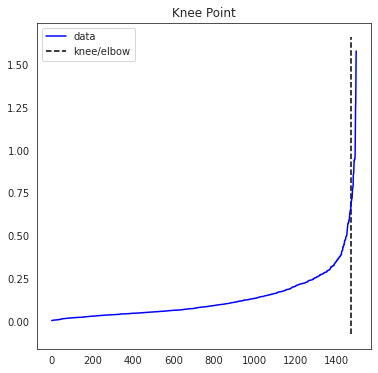

In [46]:
k2 = KneeLocator([i for i in range(0,len(variedDists))], variedDists,curve="convex")
k2.plot_knee()


<div dir=rtl >
<h1>Determining MinPts</h1>
In the previous step, to determine the optimal epsilon, we also considered a value for MinPts. But we will not necessarily have the best clustering with that value.
In this step, taking into account the obtained epsilon and testing different values for the MinPts manually and finding the best value for it, we try to cluster the previously defined datasets using both K-MEANS and DBSCAN and compare their results.
</div>

In [57]:

dbscan=DBSCAN(eps=anisoDists[kl.elbow],min_samples=1)
dbscan = dbscan.fit(X_aniso)
X_anisolabels=dbscan.labels_
dbscan=DBSCAN(eps=variedDists[k2.elbow],min_samples=1)
dbscan = dbscan.fit(X_varied)
X_variedlabels=dbscan.labels_

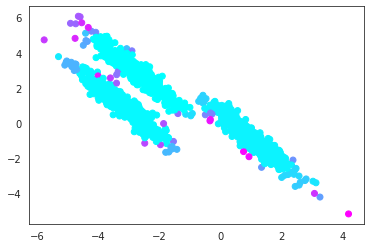

In [58]:
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], cmap=plt.cm.cool, c=X_anisolabels)

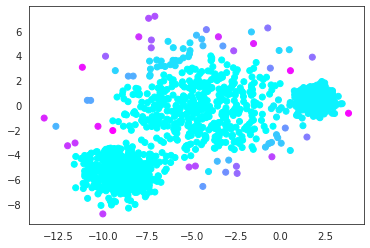

In [59]:
plt.scatter(X_varied[:, 0], X_varied[:, 1], cmap=plt.cm.cool, c=X_variedlabels)

In [60]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans = kmeans.fit(X)
kmeans = kmeans.fit(X_aniso)
X_anisolabels=kmeans.labels_
kmeans = kmeans.fit(X_varied)
X_variedlabels=kmeans.labels_


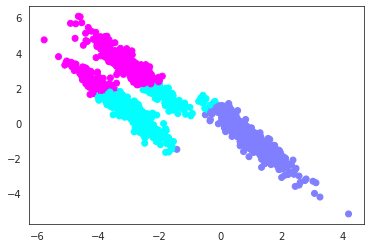

In [61]:
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], cmap=plt.cm.cool, c=X_anisolabels)

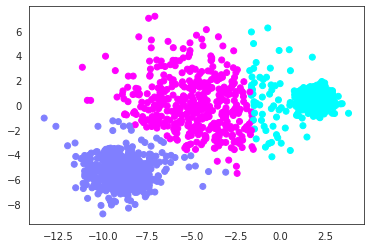

In [62]:
plt.scatter(X_varied[:, 0], X_varied[:, 1], cmap=plt.cm.cool, c=X_variedlabels)

<div>
As expected, DBSCAN did perform better for data sets that had clusters that are not linearly separable (such as the X_aniso dataset) and outlier data in these datasets have been identified more accuratly, however in datasets where the data is more scattered and our definition of a cluster is not an area with a high density of data, and the clusters can be separated linearly (such as the X_varied data set) DBSCAN performed poorly and k-means performed much better.
</div>


